In [1]:
from pathlib import Path
import numpy as np

from nimstim import create_csv
from protosc.feature_matrix import FeatureMatrix
from protosc.model.filter import FilterModel
from protosc.preprocessing import GreyScale, ViolaJones, CutCircle
from protosc.feature_extraction import FourierFeatures, HOGFeatures
from protosc.io import ReadImage
from protosc.settings import default_visual_pipeline as pipe_complex

In [2]:
# Set path to folder with faces: stim_data_dir
stim_data_dir = Path("..", "data", "Nimstim faces")

In [3]:
# Create overview of all images with their corresponding sex, emotion and mouth positioning
overview = create_csv(stim_data_dir)
# overview = overview.iloc[:10]

In [4]:
def select_y(df, **kwargs):
    selected = np.ones(len(df), dtype=int)
    for col, val in kwargs.items():
        selected *= (df[col].values == val).astype(int)
    return selected

In [5]:
files = overview['file'].values
y = select_y(overview, mouth="open")
feature_res = pipe_complex.execute(files)

In [6]:
X = FeatureMatrix.from_pipe_data(feature_res)

In [7]:
filter_res = FilterModel().execute(X, y, fold_seed=1928742, seed=293884, n_jobs=-1)

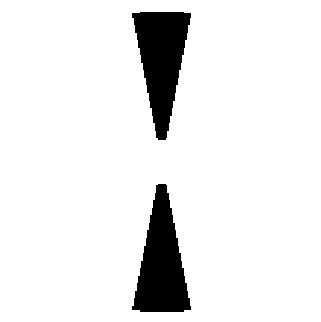

In [8]:
X.plot(filter_res)

In [9]:
filter_res

[20, 28, 12, 36, 44, 52]

In [12]:
pipe_complex.settings

FourierFeatures:
    ReadImage:
    ViolaJones:
        add_perc = 40
    CutCircle:
    FourierFeatures:
        n_angular = 8
        n_spatial = 7
        cut_circle = True
        absolute = True
HOGFeatures:
    ReadImage:
    ViolaJones:
        add_perc = 20
    CutCircle:
    HOGFeatures:
        orientations = 9
        hog_cellsize = [10, 10]
FourierFeatures_2:
    ReadImage:
    FourierFeatures:
        n_angular = 8
        n_spatial = 7
        cut_circle = True
        absolute = True